# **Hotel Booking Prediction - KNN | SMOTE | DESCISION TREE**

- ### **Objective:**
This case study aims to equip you with practical skills in data science, focusing on predicting customer behaviors and booking cancellations in the hotel industry. You will apply EDA, KNN, Decision Tree algorithms, and learn to handle class imbalances using SMOTE.

- ### **Notebook Content:**
In this notebook, the given topics have been covered:

    - Data Preprocessing
    - EDA
    - KNN
    - Decision Tree
    - SMOTE

- ### **Dataset Overview:**

Provided is the a dataset of 'INN Hotels,' containing various features related to hotel bookings. The task is to analyze this data to uncover insights and predict booking cancellations.

The dataset comprises several features:

- Booking_ID: unique identifier of each booking
- no_of_adults: Number of adults
- no_of_children: Number of Children
- no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- type_of_meal_plan: Type of meal plan booked by the customer:
- required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
- room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
- lead_time: Number of days between the date of booking and the arrival date
- arrival_year: Year of arrival date
- arrival_month: Month of arrival date
- arrival_date: Date of the month
- market_segment_type: Market segment designation.
- repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
- no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
- no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
- avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
- no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
- booking_status: Flag indicating if the booking was canceled or not.


- ### **Data Load & Structure**

In [2]:
import pandas as pd

# Load the dataset
hotel_data = pd.read_csv('I:/My Drive/Data Science/Machine Learning/Data/Hotel Reservations.csv')

# Display the initial structure and details of the dataset
initial_structure = {
    "Number of Rows": hotel_data.shape[0],
    "Number of Columns": hotel_data.shape[1],
    "Column Names": hotel_data.columns.tolist(),
    "Data Types": hotel_data.dtypes,
    "First 5 Rows": hotel_data.head()
}

initial_structure

{'Number of Rows': 36275,
 'Number of Columns': 19,
 'Column Names': ['Booking_ID',
  'no_of_adults',
  'no_of_children',
  'no_of_weekend_nights',
  'no_of_week_nights',
  'type_of_meal_plan',
  'required_car_parking_space',
  'room_type_reserved',
  'lead_time',
  'arrival_year',
  'arrival_month',
  'arrival_date',
  'market_segment_type',
  'repeated_guest',
  'no_of_previous_cancellations',
  'no_of_previous_bookings_not_canceled',
  'avg_price_per_room',
  'no_of_special_requests',
  'booking_status'],
 'Data Types': Booking_ID                               object
 no_of_adults                              int64
 no_of_children                            int64
 no_of_weekend_nights                      int64
 no_of_week_nights                         int64
 type_of_meal_plan                        object
 required_car_parking_space                int64
 room_type_reserved                       object
 lead_time                                 int64
 arrival_year                  

- ### **Data Info**

In [3]:
# Performing manual EDA

# Summary statistics for numerical features
numerical_summary = hotel_data.describe()

# Checking for missing values
missing_values = hotel_data.isnull().sum()

# Count of unique values for each column
unique_values = hotel_data.nunique()

# Overview of categorical data
categorical_columns = hotel_data.select_dtypes(include=['object']).columns
categorical_overview = hotel_data[categorical_columns].describe()

eda_summary = {
    "Numerical Summary": numerical_summary,
    "Missing Values": missing_values,
    "Unique Value Counts": unique_values,
    "Categorical Data Overview": categorical_overview
}

eda_summary



{'Numerical Summary':        no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
 count  36275.000000    36275.000000          36275.000000       36275.000000   
 mean       1.844962        0.105279              0.810724           2.204300   
 std        0.518715        0.402648              0.870644           1.410905   
 min        0.000000        0.000000              0.000000           0.000000   
 25%        2.000000        0.000000              0.000000           1.000000   
 50%        2.000000        0.000000              1.000000           2.000000   
 75%        2.000000        0.000000              2.000000           3.000000   
 max        4.000000       10.000000              7.000000          17.000000   
 
        required_car_parking_space     lead_time  arrival_year  arrival_month  \
 count                36275.000000  36275.000000  36275.000000   36275.000000   
 mean                     0.030986     85.232557   2017.820427       7.423653   
 std 

- ### **Key Insights**

1. **No Missing Data:** The dataset is comprehensive and well-maintained with no missing values across all the columns. This indicates a high-quality data collection process and reduces the need for imputation techniques.

2. **Variety in Booking Characteristics:** The dataset exhibits a wide range of booking characteristics, such as varying numbers of adults and children, lengths of stay (weekend and week nights), and lead times for bookings. This diversity suggests the dataset covers a broad spectrum of customer types and booking scenarios.

3. **Dominance of Certain Categories:** Certain categories are more prevalent than others. For instance, "Meal Plan 1" is the most common meal plan, and "Room_Type 1" is the most frequently reserved room type. The "Online" market segment is the largest, indicating a trend towards digital booking channels.

4. **Distribution of Booking Status:** The distribution of the booking_status shows that there are more non-canceled bookings than canceled ones. This is crucial for predictive modeling, as it suggests a potential class imbalance that might need to be addressed.

5. **Repeat Guest Ratio**: A relatively small proportion of bookings are made by repeat guests. This could imply a focus on attracting new customers or indicate potential areas for improving customer retention.

- ### **Exploratory Data Analysis** 

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

Q1: Distribution of the number of adults and children in bookings

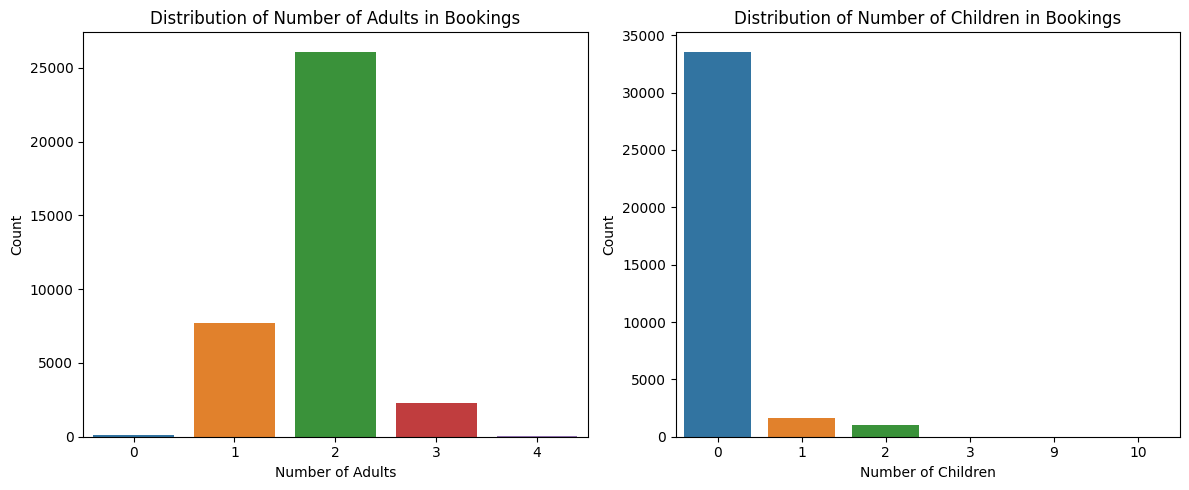

In [5]:
plt.figure(figsize=(12, 5))

# Plot for the number of adults
plt.subplot(1, 2, 1)
sns.countplot(x='no_of_adults', data=hotel_data)
plt.title('Distribution of Number of Adults in Bookings')
plt.xlabel('Number of Adults')
plt.ylabel('Count')

# Plot for the number of children
plt.subplot(1, 2, 2)
sns.countplot(x='no_of_children', data=hotel_data)
plt.title('Distribution of Number of Children in Bookings')
plt.xlabel('Number of Children')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

1. **Distribution of the Number of Adults and Children in Bookings:**

    The majority of bookings are made for two adults, indicating a significant presence of couples or pairs.
    Bookings with children are less common, with most bookings involving no children.

Q2: Distribution of room types reserved

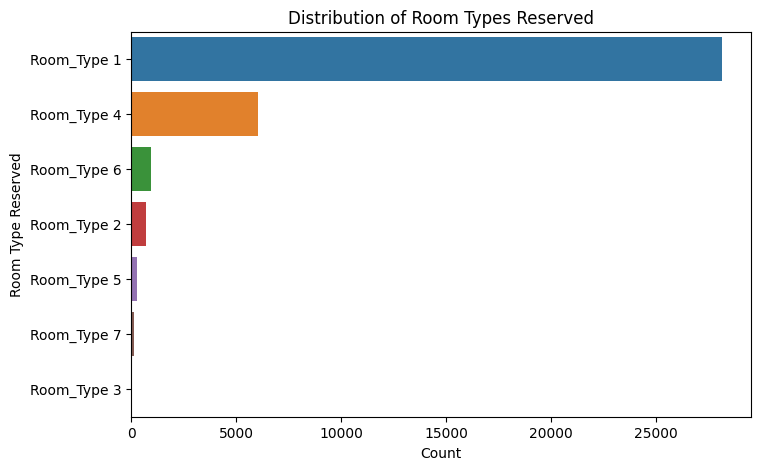

In [6]:
plt.figure(figsize=(8, 5))
sns.countplot(y='room_type_reserved', data=hotel_data, order = hotel_data['room_type_reserved'].value_counts().index)
plt.title('Distribution of Room Types Reserved')
plt.xlabel('Count')
plt.ylabel('Room Type Reserved')
plt.show()

2. **Distribution of Room Types Reserved:**
   
    Certain room types are more popular than others, with **Room_Type 1** or **Room_Type 4** being the most frequently chosen. This could indicate customer preferences or availability issues.


Q3. Relationship between lead time and room type

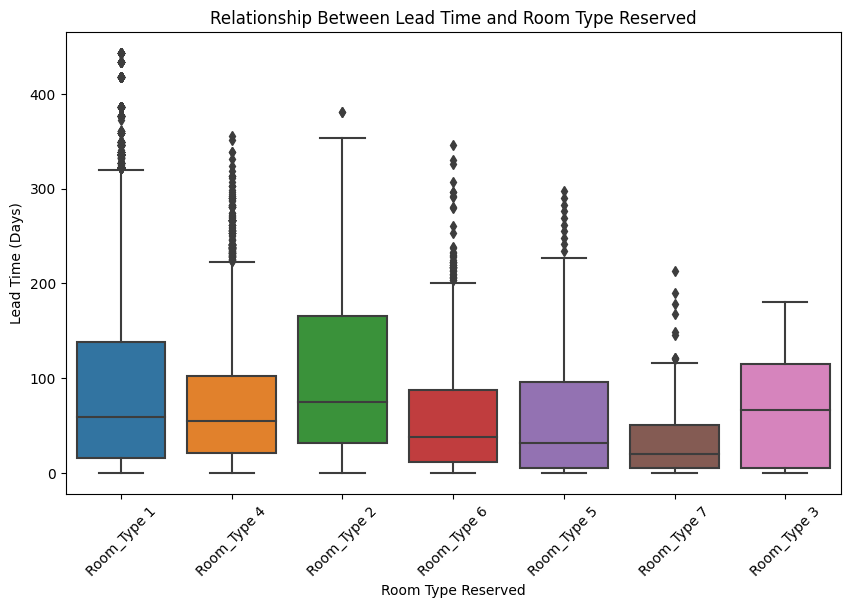

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type_reserved', y='lead_time', data=hotel_data)
plt.title('Relationship Between Lead Time and Room Type Reserved')
plt.xlabel('Room Type Reserved')
plt.ylabel('Lead Time (Days)')
plt.xticks(rotation=45)
plt.show()

3. **Relationship Between Lead Time and Room Type Reserved:**

    The lead time varies across different room types. Some room types tend to be booked further in advance than others, which might be indicative of their popularity or scarcity.

Q4: Analysis of booking cancellations by month

<Figure size 1200x600 with 0 Axes>

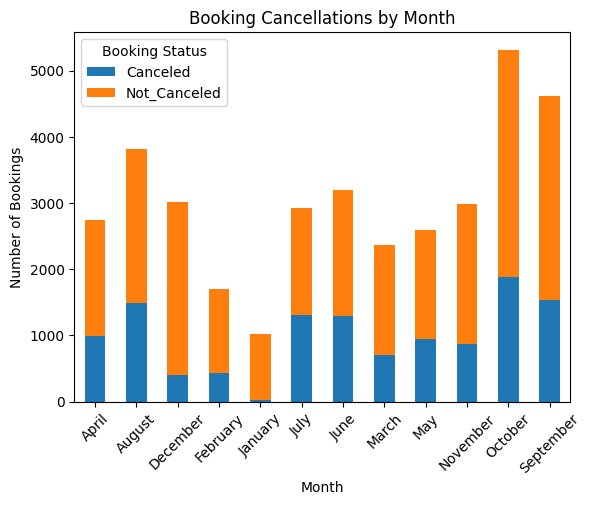

In [8]:
# Adding a month name column for better readability in plots
hotel_data['arrival_month_name'] = hotel_data['arrival_month'].apply(lambda x: pd.Timestamp(2024, x, 1).strftime('%B'))

# Grouping data by month and booking status
monthly_cancellations = hotel_data.groupby(['arrival_month_name', 'booking_status']).size().unstack()

# Plotting the cancellations by month
plt.figure(figsize=(12, 6))
monthly_cancellations.plot(kind='bar', stacked=True)
plt.title('Booking Cancellations by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.legend(title='Booking Status')
plt.show()


**Booking Cancellations by Month:**

The bar chart illustrates the distribution of bookings (canceled and not canceled) across different months. It can be observed that certain months may have higher cancellation rates, which could be influenced by seasonal factors, holidays, or other external events.

Q5: Comparison of average price per room across different room types

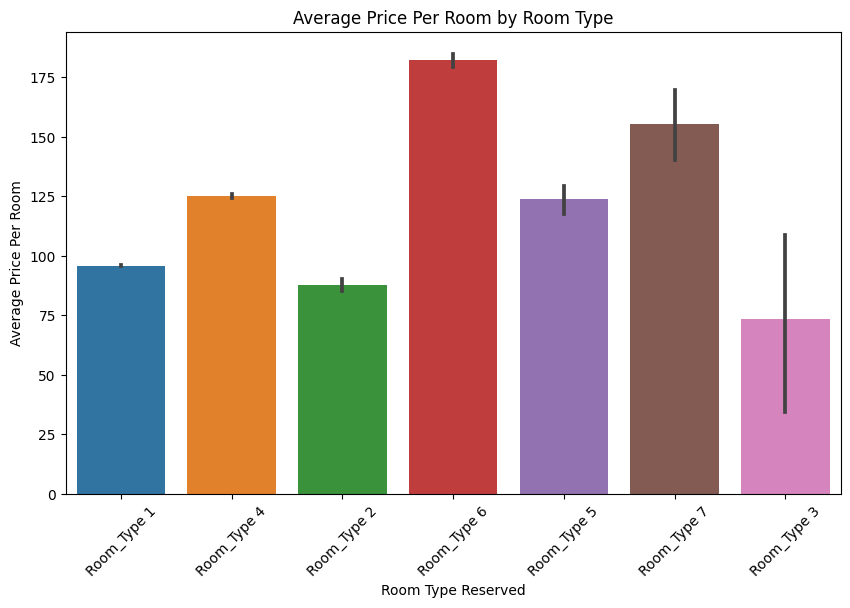

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x='room_type_reserved', y='avg_price_per_room', data=hotel_data)
plt.title('Average Price Per Room by Room Type')
plt.xlabel('Room Type Reserved')
plt.ylabel('Average Price Per Room')
plt.xticks(rotation=45)
plt.show()

**Average Price Per Room by Room Type:**

The bar plot shows the variation in average prices across different room types. Some room types consistently have a higher average price, possibly reflecting their quality, size, or amenities.

Q6: Impact of meal plan type on booking status

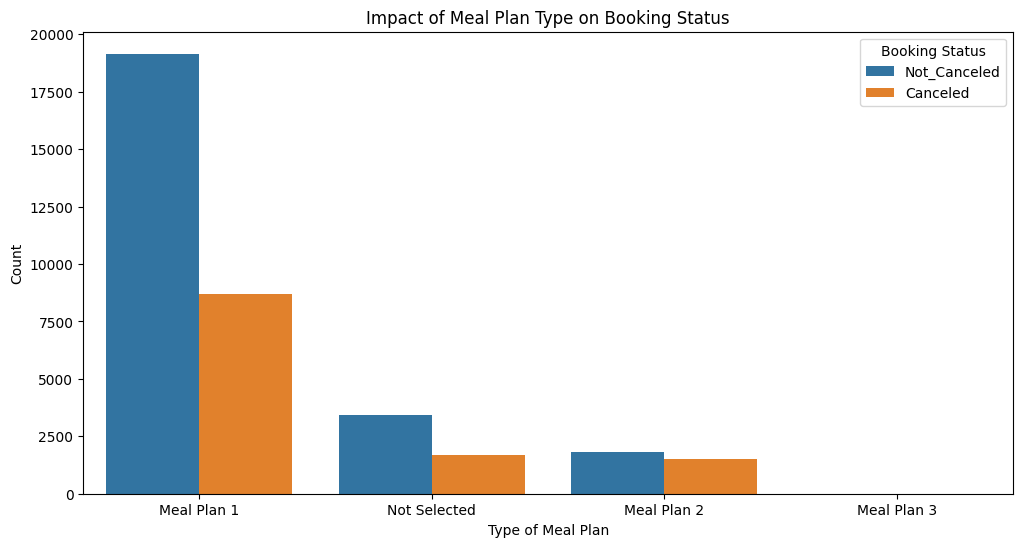

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(x='type_of_meal_plan', hue='booking_status', data=hotel_data)
plt.title('Impact of Meal Plan Type on Booking Status')
plt.xlabel('Type of Meal Plan')
plt.ylabel('Count')
plt.legend(title='Booking Status')
plt.show()



**Impact of Meal Plan Type on Booking Status:**

The count plot indicates how different meal plans correlate with booking status (canceled or not canceled). It can provide insights into whether certain meal plans are more likely to be associated with cancellations.

Q7: Trend of bookings over different months of the year

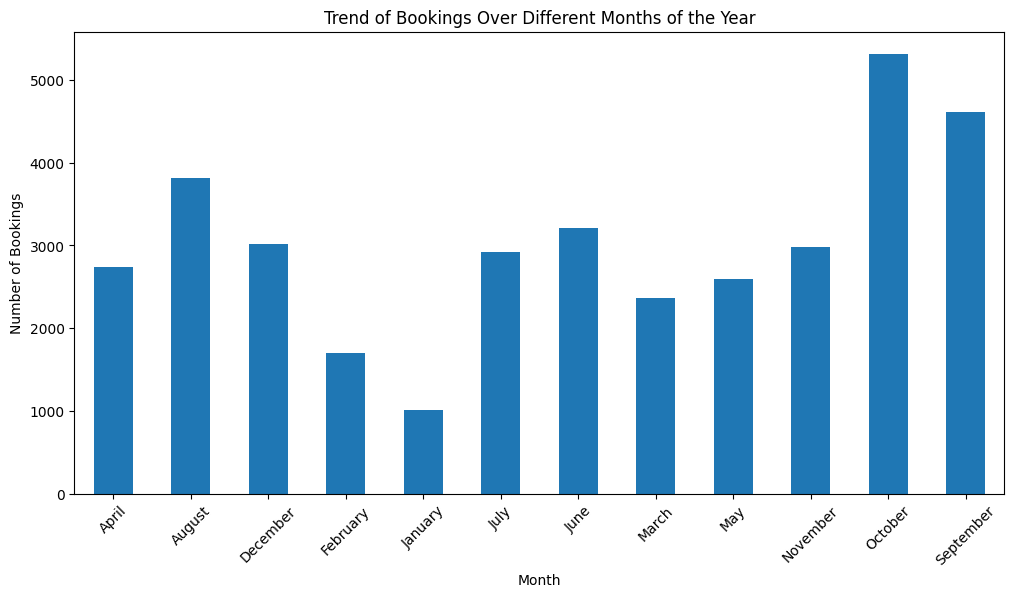

In [11]:
# Grouping data by month and counting bookings
monthly_bookings = hotel_data.groupby('arrival_month_name').size()

# Plotting the trend of bookings over months
plt.figure(figsize=(12, 6))
monthly_bookings.plot(kind='bar')
plt.title('Trend of Bookings Over Different Months of the Year')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

**Trend of Bookings Over Different Months of the Year:**

The bar chart displays the number of bookings for each month, indicating seasonal trends. Some months show higher booking rates, suggesting peak travel seasons.

Q8: Correlation between number of special requests and booking cancellations

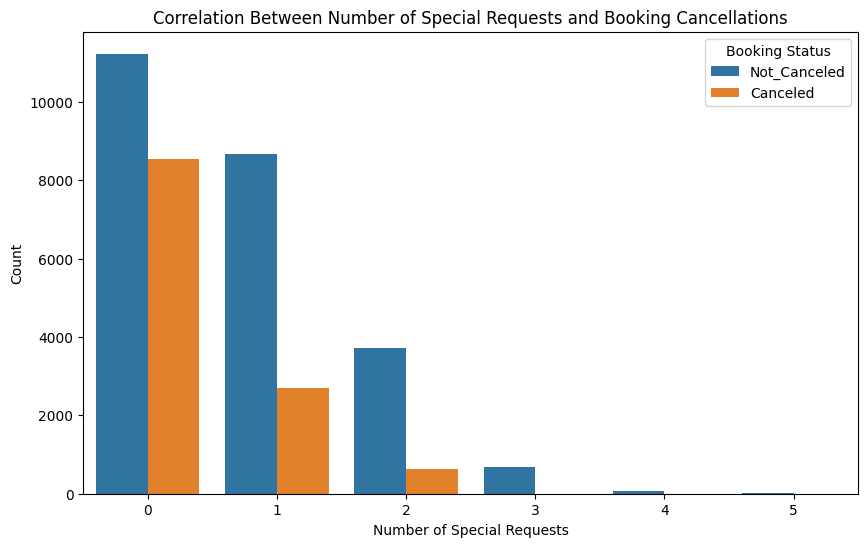

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='no_of_special_requests', hue='booking_status', data=hotel_data)
plt.title('Correlation Between Number of Special Requests and Booking Cancellations')
plt.xlabel('Number of Special Requests')
plt.ylabel('Count')
plt.legend(title='Booking Status')
plt.show()

**Correlation Between Number of Special Requests and Booking Cancellations:**

This count plot reveals how the number of special requests correlates with booking status. It might indicate whether more special requests are associated with a higher or lower likelihood of cancellation.

Q9: Distribution of market segment types in hotel bookings

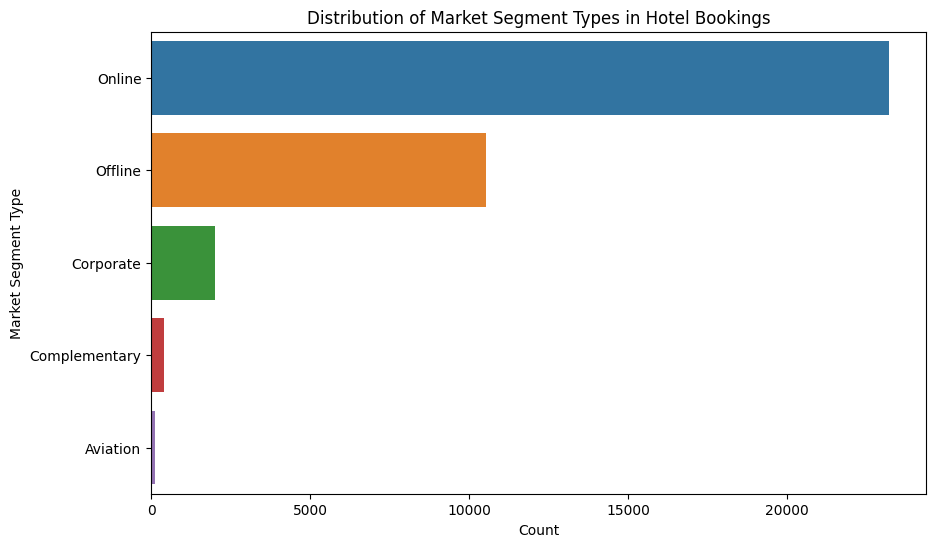

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(y='market_segment_type', data=hotel_data, order = hotel_data['market_segment_type'].value_counts().index)
plt.title('Distribution of Market Segment Types in Hotel Bookings')
plt.xlabel('Count')
plt.ylabel('Market Segment Type')
plt.show()


**Distribution of Market Segment Types in Hotel Bookings:**

The distribution of bookings across different market segments is illustrated. This helps in understanding which segments are the most significant contributors to the hotel bookings. **Online Bookings** tend to be the most Preferred Channel for the customers to book Hotel Rooms

Q10: Comparison of the number of previous cancellations between repeated and new guests


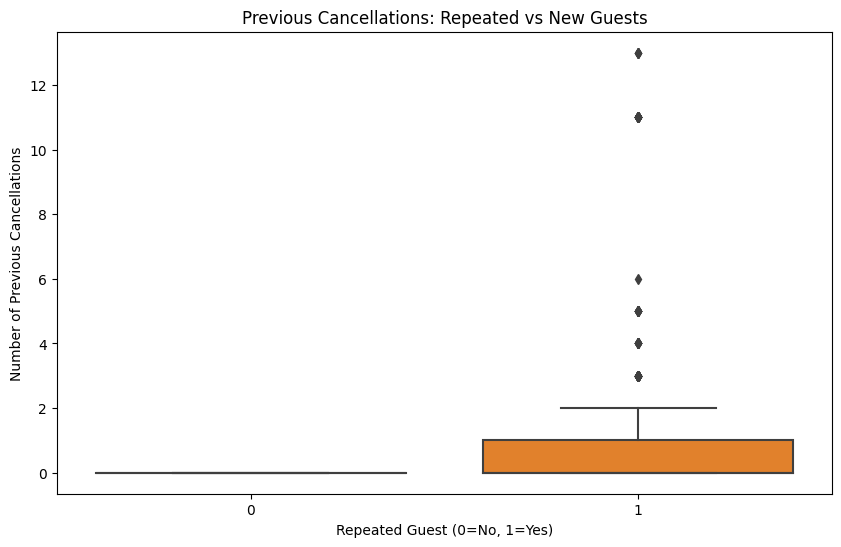

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='repeated_guest', y='no_of_previous_cancellations', data=hotel_data)
plt.title('Previous Cancellations: Repeated vs New Guests')
plt.xlabel('Repeated Guest (0=No, 1=Yes)')
plt.ylabel('Number of Previous Cancellations')
plt.show()



**Previous Cancellations: Repeated vs New Guests:**

The boxplot compares the number of previous cancellations between repeated and new guests. This can highlight if repeat guests have a different cancellation history compared to new guests.

- ### **Data Pre-Processing** 

In [15]:
# Dropping the 'Booking_ID' column
hotel_data = hotel_data.drop('Booking_ID', axis=1)

# Confirming the drop
columns_after_drop = hotel_data.columns

columns_after_drop

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'arrival_month_name'],
      dtype='object')

- ### **Encoding**

In [16]:
from sklearn.preprocessing import LabelEncoder

# Initializing Label Encoder
label_encoder = LabelEncoder()

# Applying Label Encoding to categorical columns
hotel_data['encoded_meal_plan'] = label_encoder.fit_transform(hotel_data['type_of_meal_plan'])
hotel_data['encoded_room_type_reserved'] = label_encoder.fit_transform(hotel_data['room_type_reserved'])
hotel_data['encoded_market_segment_type'] = label_encoder.fit_transform(hotel_data['market_segment_type'])
hotel_data['encoded_booking_status'] = label_encoder.fit_transform(hotel_data['booking_status'])

# Displaying the first few rows of the dataset after encoding
hotel_data.head()



,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,...,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,arrival_month_name,encoded_meal_plan,encoded_room_type_reserved,encoded_market_segment_type,encoded_booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,...,0,0,65.00,0,Not_Canceled,October,0,0,3,1
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,...,0,0,106.68,1,Not_Canceled,November,3,0,4,1
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,...,0,0,60.00,0,Canceled,February,0,0,4,0
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,...,0,0,100.00,0,Canceled,May,0,0,4,0
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,...,0,0,94.50,0,Canceled,April,3,0,4,0


- ### **Data Cleanup**

In [17]:
# Dropping the original categorical columns from the hotel_data dataframe
hotel_data.drop(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status'], axis=1, inplace=True)

# Displaying the first few rows of the dataframe after dropping the columns
hotel_data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,arrival_month_name,encoded_meal_plan,encoded_room_type_reserved,encoded_market_segment_type,encoded_booking_status
0,2,0,1,2,0,224,2017,10,2,0,0,0,65.00,0,October,0,0,3,1
1,2,0,2,3,0,5,2018,11,6,0,0,0,106.68,1,November,3,0,4,1
2,1,0,2,1,0,1,2018,2,28,0,0,0,60.00,0,February,0,0,4,0
3,2,0,0,2,0,211,2018,5,20,0,0,0,100.00,0,May,0,0,4,0
4,2,0,1,1,0,48,2018,4,11,0,0,0,94.50,0,April,3,0,4,0


In [18]:
#saving the cleaned and encoded data

#hotel_data.to_csv('I:/My Drive/Data Science/Machine Learning/Data/Hotel Reservations Cleaned.csv', index=False)

- ### **Correlation Analysis**

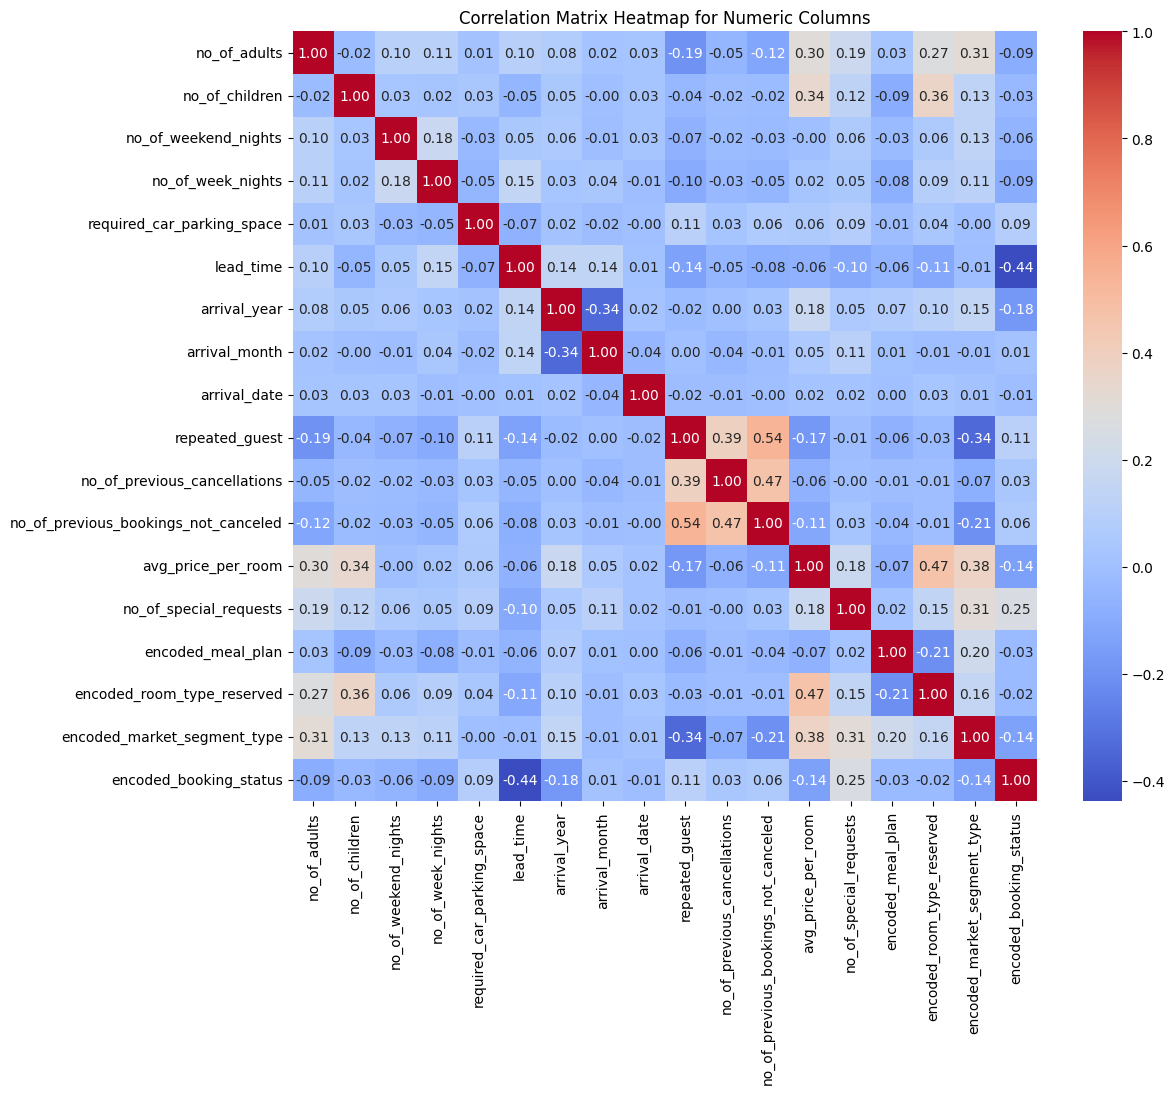

In [19]:
import numpy as np

# Re-identifying numeric columns for correlation matrix
numeric_columns = hotel_data.select_dtypes(include=[np.number]).columns

# Recalculating the correlation matrix for numeric columns only
numeric_correlation_matrix = hotel_data[numeric_columns].corr()

# Re-plotting the heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap for Numeric Columns')
plt.show()

- ### **Correlation Analysis Insights**

1. **Lead Time vs. Booking Status**:
   - Negative correlation (`-0.44`): Longer lead times are associated with higher cancellation rates.

2. **Special Requests vs. Booking Status**:
   - Positive correlation (`0.25`): More special requests correlate with lower cancellation rates.

3. **Average Room Price**:
   - Positive correlation with `no_of_adults` (`0.30`) and `no_of_children` (`0.34`): Higher-priced rooms tend to have more guests.
   - Slight negative correlation with `encoded_booking_status` (`-0.14`): More expensive bookings have a marginally higher cancellation rate.

4. **Room Type Reserved**:
   - Positive correlation with `no_of_children` (`0.36`) and `avg_price_per_room` (`0.16`): Certain room types, likely accommodating more guests or offering more amenities, are priced higher.

5. **Market Segment Type**:
   - Correlations with `no_of_adults` (`0.31`) and `avg_price_per_room` (`0.38`): Reflects different booking and pricing patterns across market segments.

6. **Repeated Guests**:
   - Negative correlation with `lead_time` (`-0.21`): Repeat guests tend to book closer to their arrival date.
   - Positive correlation with `encoded_booking_status` (`0.11`): Repeat guests are less likely to cancel their bookings.

> _Note: Correlation does not imply causation. Further analysis is needed for definitive conclusions._


- ### **Target - Output Variable Definition**

In [20]:
X = hotel_data.drop('encoded_booking_status', axis=1)
y = hotel_data['encoded_booking_status']

- ### **Standardization**

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Removing the 'arrival_month_name' column from the features
X_modified = X.drop('arrival_month_name', axis=1)

# Standardizing the modified features
X_scaled = scaler.fit_transform(X_modified)

# Converting the scaled features back to a DataFrame for ease of use
X_scaled = pd.DataFrame(X_scaled, columns=X_modified.columns)

# Display the first few rows of the standardized features
X_scaled.head()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,encoded_meal_plan,encoded_room_type_reserved,encoded_market_segment_type
0,0.298893,-0.26147,0.217401,-0.144803,-0.178819,1.614896,-2.137469,0.839242,-1.555662,-0.16221,-0.063393,-0.087456,-1.095033,-0.78814,-0.491972,-0.506411,-0.810601
1,0.298893,-0.26147,1.365993,0.563972,-0.178819,-0.933701,0.467843,1.164990,-1.098013,-0.16221,-0.063393,-0.087456,0.092806,0.48376,2.370304,-0.506411,0.656692
2,-1.628975,-0.26147,1.365993,-0.853578,-0.178819,-0.980250,0.467843,-1.766747,1.419055,-0.16221,-0.063393,-0.087456,-1.237528,-0.78814,-0.491972,-0.506411,0.656692
3,0.298893,-0.26147,-0.931190,-0.144803,-0.178819,1.463610,0.467843,-0.789501,0.503757,-0.16221,-0.063393,-0.087456,-0.097567,-0.78814,-0.491972,-0.506411,0.656692
4,0.298893,-0.26147,0.217401,-0.853578,-0.178819,-0.433291,0.467843,-1.115250,-0.525952,-0.16221,-0.063393,-0.087456,-0.254312,-0.78814,2.370304,-0.506411,0.656692


In [22]:
scaled_data = pd.DataFrame({'Max': X_scaled.head().max(), 'Min': X_scaled.head().min()})
scaled_data

,Max,Min
no_of_adults,0.298893,-1.628975
no_of_children,-0.261470,-0.261470
no_of_weekend_nights,1.365993,-0.931190
no_of_week_nights,0.563972,-0.853578
required_car_parking_space,-0.178819,-0.178819
lead_time,1.614896,-0.980250
arrival_year,0.467843,-2.137469
arrival_month,1.164990,-1.766747
arrival_date,1.419055,-1.555662
repeated_guest,-0.162210,-0.162210


- ### **Train Test Split**

In [23]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets with a 70/30 ratio
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Displaying the sizes of the train and test sets to confirm the split
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)


(((25392, 17), (25392,)), ((10883, 17), (10883,)))

- ### **KNN Implementation**

In [24]:
# Import KNN from SKLearn Library 
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn = KNeighborsClassifier(n_neighbors=1)

In [26]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [27]:
pred = knn.predict(X_test)

- ### **Prediction and evaluation**

In [28]:
#Importing Classification Report and Confusion Matrix for Evaluation
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
print(confusion_matrix(y_test,pred))

[[2765  842]
 [ 839 6437]]


In [30]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      3607
           1       0.88      0.88      0.88      7276

    accuracy                           0.85     10883
   macro avg       0.83      0.83      0.83     10883
weighted avg       0.85      0.85      0.85     10883



- ### **Classification Report**
    
    - Precision: How many of the bookings we predicted to be canceled were actually canceled.
    - Recall: How many of the actual canceled bookings we correctly predicted.
    - F1-Score: A combination of precision and recall into a single number.
    - Support: How many cases of each booking status (canceled or not) we had in the test set.
    - Accuracy: How often the model was correct overall.

In your model:

It was correct about 77% of the time for predicting not canceled bookings and 88% for canceled bookings.

It was correct about 85% of the time overall.

- ### **Confusion Matrix**
    
    - Top-Left: True negatives, not canceled bookings correctly predicted.
    - Top-Right: False positives, not canceled bookings incorrectly predicted as canceled.
    - Bottom-Left: False negatives, canceled bookings incorrectly predicted as not canceled.
    - Bottom-Right: True positives, canceled bookings correctly predicted.

In numbers:

- Correctly predicted not canceled: 2765
- Incorrectly predicted canceled: 842
- Incorrectly predicted not canceled: 839
- Correctly predicted canceled: 6437

The model is generally doing a good job at predicting cancellations.

In [31]:
#Training Accuracy
print(knn.score(X_train, y_train)*100)

99.28717706364209


In [53]:
#Testing Accuracy
print(knn.score(X_test, y_test)*100)

84.93062574657722


- ### **K-Value selection**

Maximum accuracy:- 0.8493062574657723 at K = 5


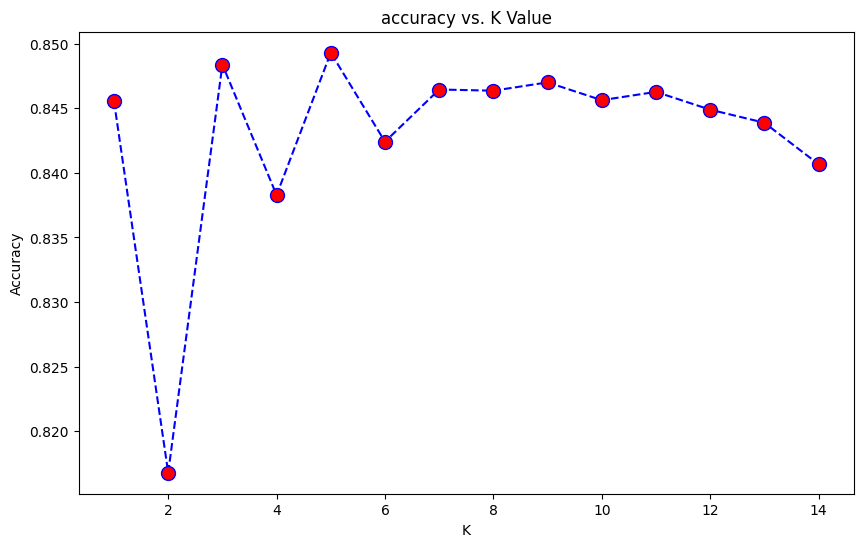

In [33]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,15):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

plt.figure(figsize=(10,6))
plt.plot(range(1,15),acc,color = 'blue',linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc))+1)

This indicates that are getting the max accuracy of **84.5%** at **K=5**. This is a good accuracy and K=5 is computation friendly

In [34]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76      3607
           1       0.88      0.90      0.89      7276

    accuracy                           0.85     10883
   macro avg       0.83      0.82      0.83     10883
weighted avg       0.85      0.85      0.85     10883



After using the best **K value = 5**:

    - We got a better Precision score of **79%** predicting not canceled bookings and **88%** for canceled bookings.
    - It was correct about 85% of the time overall.

- ### **Plotting Confusion Matrix**

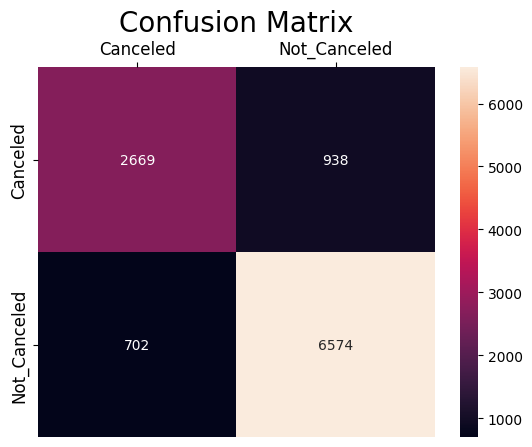

In [35]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,pred), annot=True, ax = ax, fmt = 'g');
ax.set_title('Confusion Matrix', fontsize=20)

ax.xaxis.set_ticklabels(['Canceled', 'Not_Canceled'], fontsize = 12)
ax.xaxis.tick_top()

ax.yaxis.set_ticklabels(['Canceled', 'Not_Canceled'], fontsize = 12)
plt.show()

- ### **Decision Tree** 

In [36]:
# Importing Libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [37]:
# Initializing and training the Decision Tree Classifier with Gini impurity

dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [38]:
# Making predictions and evaluating the models
y_pred_gini = dt_gini.predict(X_test)

accuracy_gini = accuracy_score(y_test, y_pred_gini)

accuracy_gini

0.8663971331434347

In [39]:
# Initializing and training the Decision Tree Classifier with Information Gain (Entropy)
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [40]:
# Making predictions and evaluating the models
y_pred_entropy = dt_entropy.predict(X_test)

accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

accuracy_entropy

0.8701644767067904

Gini Model Evaluation Metrics:
Confusion Matrix:
 [[2900  707]
 [ 747 6529]]
Precision: 0.90
Recall: 0.90
F1 Score: 0.90
ROC AUC: 0.85

Entropy Model Evaluation Metrics:
Confusion Matrix:
 [[2961  646]
 [ 767 6509]]
Precision: 0.91
Recall: 0.89
F1 Score: 0.90
ROC AUC: 0.86


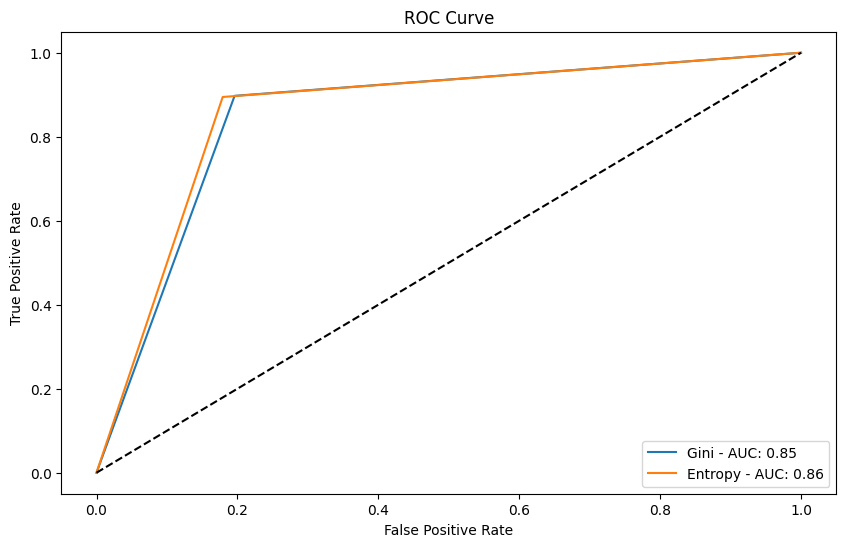

In [41]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Assuming y_test, y_pred_gini, and y_pred_entropy are already defined from your model predictions

# Evaluation metrics for Gini model
confusion_gini = confusion_matrix(y_test, y_pred_gini)
precision_gini = precision_score(y_test, y_pred_gini)
recall_gini = recall_score(y_test, y_pred_gini)
f1_score_gini = f1_score(y_test, y_pred_gini)
roc_auc_gini = roc_auc_score(y_test, y_pred_gini)

# Evaluation metrics for Entropy model
confusion_entropy = confusion_matrix(y_test, y_pred_entropy)
precision_entropy = precision_score(y_test, y_pred_entropy)
recall_entropy = recall_score(y_test, y_pred_entropy)
f1_score_entropy = f1_score(y_test, y_pred_entropy)
roc_auc_entropy = roc_auc_score(y_test, y_pred_entropy)

# Printing the evaluation metrics
print("Gini Model Evaluation Metrics:")
print("Confusion Matrix:\n", confusion_gini)
print("Precision: {:.2f}".format(precision_gini))
print("Recall: {:.2f}".format(recall_gini))
print("F1 Score: {:.2f}".format(f1_score_gini))
print("ROC AUC: {:.2f}".format(roc_auc_gini))

print("\nEntropy Model Evaluation Metrics:")
print("Confusion Matrix:\n", confusion_entropy)
print("Precision: {:.2f}".format(precision_entropy))
print("Recall: {:.2f}".format(recall_entropy))
print("F1 Score: {:.2f}".format(f1_score_entropy))
print("ROC AUC: {:.2f}".format(roc_auc_entropy))

# ROC curve calculations
fpr_gini, tpr_gini, _ = roc_curve(y_test, y_pred_gini)
fpr_entropy, tpr_entropy, _ = roc_curve(y_test, y_pred_entropy)

# Plotting ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_gini, tpr_gini, label='Gini - AUC: {:.2f}'.format(roc_auc_gini))
plt.plot(fpr_entropy, tpr_entropy, label='Entropy - AUC: {:.2f}'.format(roc_auc_entropy))
plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

From this graph, we can see that we are getting almost the same Accuracy from both Gini and Entropy Impurities, so either one can be used for this project.

In [42]:
# Removing the 'arrival_month_name' column from the features
X_modified

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,encoded_meal_plan,encoded_room_type_reserved,encoded_market_segment_type
0,2,0,1,2,0,224,2017,10,2,0,0,0,65.00,0,0,0,3
1,2,0,2,3,0,5,2018,11,6,0,0,0,106.68,1,3,0,4
2,1,0,2,1,0,1,2018,2,28,0,0,0,60.00,0,0,0,4
3,2,0,0,2,0,211,2018,5,20,0,0,0,100.00,0,0,0,4
4,2,0,1,1,0,48,2018,4,11,0,0,0,94.50,0,3,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,85,2018,8,3,0,0,0,167.80,1,0,3,4
36271,2,0,1,3,0,228,2018,10,17,0,0,0,90.95,2,0,0,4
36272,2,0,2,6,0,148,2018,7,1,0,0,0,98.39,2,0,0,4
36273,2,0,0,3,0,63,2018,4,21,0,0,0,94.50,0,3,0,4


- ### **Feature Importance Analysis**

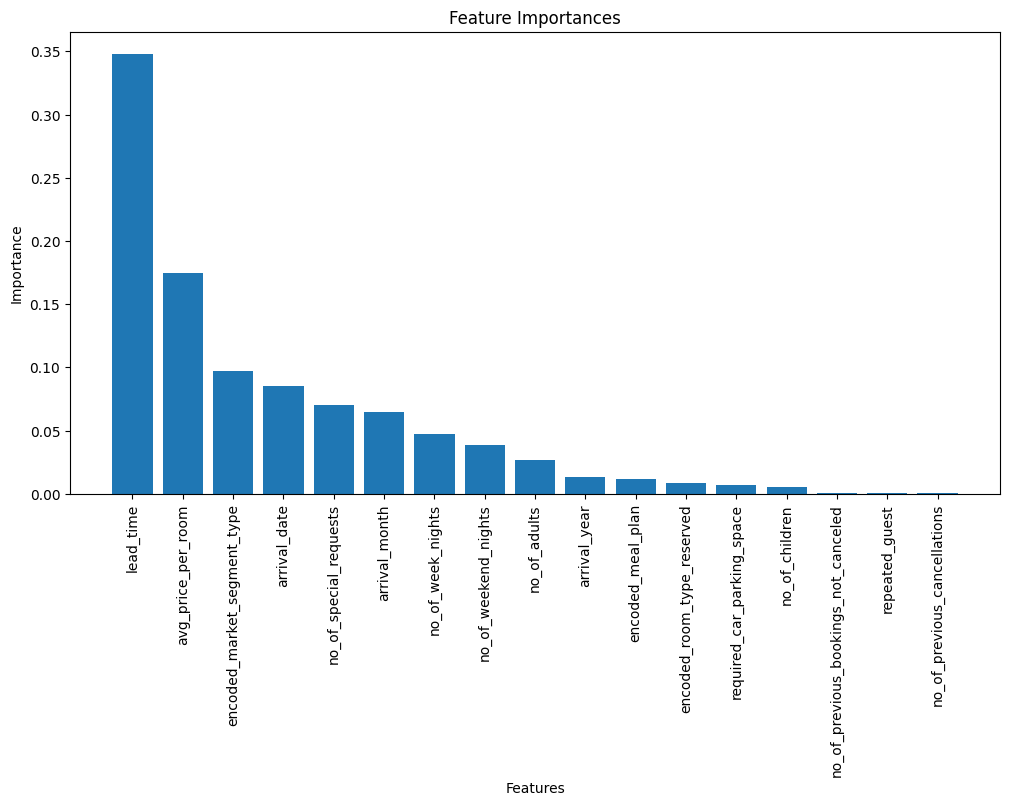

In [43]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd


# Assuming you have a dataset 'df_encoded' and target variable 'y'

# Train a Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_modified, y)

# Get Feature Importances
importances = dt_model.feature_importances_

# Convert to a DataFrame
feature_importances = pd.DataFrame({'feature': X_modified.columns, 'importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Visualize Feature Importances
plt.figure(figsize=(12, 6))
plt.bar(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.title('Feature Importances')
plt.show()



The visual representation provided above illustrates the importance of various features used in our predictive model. The bar chart delineates the relative significance of each feature in the context of the model's predictive capability:

- Lead Time: This feature stands out as the most impactful, suggesting that the interval between booking and the actual stay date is a strong predictor of the outcome.
- Average Daily Rate (ADR) and Total of Special Requests: These features are also pivotal, albeit to a lesser degree, indicating their notable but lesser influence on the prediction.

Other features: such as arrival_date_year, stays_in_weekend_nights, and previous_cancellations, contribute less to the model's predictions, which implies that these factors are less decisive in the context of our specific model.

It is important to clarify that this chart conveys information about feature importance from the perspective of the model's internal decision-making process and is not indicative of data balance.


In [44]:
y_train.value_counts()

encoded_booking_status
1    17114
0     8278
Name: count, dtype: int64

1: Not cancelled

0: Cancelled

- ### **Addressing Data Imbalance in Booking Status Prediction**
Our initial investigation into the target variable, encoded_booking_status, reveals an imbalanced distribution between the two classes:

- 1 (Not cancelled): 17714 instances
- 0 (Cancelled): 8278 instances

This imbalance is problematic because it can lead to a model that is biased towards the majority class, potentially impacting the accuracy of our predictions for the minority class.

To rectify this imbalance and create a more equitable training environment for our model, we have utilized the **Synthetic Minority Over-sampling Technique (SMOTE)**. SMOTE is an advanced over-sampling method that generates synthetic samples for the minority class. This technique helps to balance the class distribution without causing overfitting, which can happen with simple over-sampling.

In [45]:
X_train.shape

(25392, 17)

- ### **SMOTE Application on Training Data**

In [46]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [47]:
y_train.value_counts()

encoded_booking_status
1    17114
0     8278
Name: count, dtype: int64

We reassessed the distribution of our target variable and confirmed that the classes are now balanced 
- 1 (Not cancelled): 17714 instances
- 0 (Cancelled): 17714 instances

The shape of our training dataset, X_train, has also been updated to reflect the additional synthetic samples, now containing 35428 instances with 17 features each. This balanced dataset is expected to improve the performance of our predictive models and enable them to learn the characteristics of both classes more effectively.

By addressing the imbalance in the data, we enhance the model's ability to generalize and thus increase its reliability in making predictions on unseen data.

In [48]:
y_sm.value_counts()

encoded_booking_status
0    17114
1    17114
Name: count, dtype: int64

In [49]:
# This dataframe is just for understanding and to see the balanced data
import pandas as pd

# Concatenate features and target into a single DataFrame
df_resampled = pd.concat([pd.DataFrame(X_sm, columns=X.columns), pd.DataFrame(y_sm, columns=['encoded_booking_status'])], axis=1)

# Display the resulting DataFrame
df_resampled.head(2)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,arrival_month_name,encoded_meal_plan,encoded_room_type_reserved,encoded_market_segment_type,encoded_booking_status
0,0.298893,-0.26147,0.217401,0.563972,-0.178819,1.335598,0.467843,0.187744,1.533467,-0.16221,-0.063393,-0.087456,-0.355483,-0.78814,NaN,-0.491972,-0.506411,0.656692,0
1,0.298893,-0.26147,0.217401,0.563972,-0.178819,-0.072531,0.467843,-1.440999,0.961406,-0.16221,-0.063393,-0.087456,-0.355483,0.48376,NaN,-0.491972,-0.506411,0.656692,0


- ### **KNN Evaluation Metrics**

In [50]:
# KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_sm, y_sm)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Displaying results for KNN
print("K-Nearest Neighbors (KNN) Model:")
print(f"Accuracy: {accuracy_knn:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.8294
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.83      0.76      3607
           1       0.91      0.83      0.87      7276

    accuracy                           0.83     10883
   macro avg       0.81      0.83      0.81     10883
weighted avg       0.84      0.83      0.83     10883



- ### **Decision Tree Evaluation Metrics**

In [51]:
# Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_sm, y_sm)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)


# Displaying results for Decision Tree
print("\nDecision Tree Model:")
print(f"Accuracy: {accuracy_dt:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Model:
Accuracy: 0.8674
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.81      3607
           1       0.91      0.89      0.90      7276

    accuracy                           0.87     10883
   macro avg       0.85      0.86      0.85     10883
weighted avg       0.87      0.87      0.87     10883



- ### **Model Comparison: KNN vs Decision Tree**

#### **Accuracy**
- **KNN**: 0.8294
- **Decision Tree**: 0.8674'

_Decision Tree model has a higher overall accuracy._

#### **Precision (Class 0 | Class 1)**
- **KNN**: 0.71 | 0.91
- **Decision Tree**: 0.78 | 0.91

_Decision Tree model has better precision for class 0, same for class 1._

#### **Recall (Class 0 | Class 1)**
- **KNN**: 0.83 | 0.83
- **Decision Tree**: 0.83 | 0.89

_Decision Tree model has a better recall for class 1, same for class 0._

#### **F1-Score (Class 0 | Class 1)**
- **KNN**: 0.76 | 0.87
- **Decision Tree**: 0.81 | 0.90

_Decision Tree model has a better F1-Score for both classes._

#### **Weighted Average (Precision | Recall | F1-Score)**
- **KNN**: 0.84 | 0.83 | 0.83
- **Decision Tree**: 0.87 | 0.87 | 0.87

_Decision Tree model has higher weighted averages, indicating better performance across classes with respect to support._

### **Conclusion**
The Decision Tree model outperforms the KNN model in all evaluated metrics, including overall accuracy, precision, recall, and F1-score, for both classes. It also has higher macro and weighted averages, suggesting better performance across the board, especially for class 1, which has a larger support.


- ### **Decision Tree Visualization**

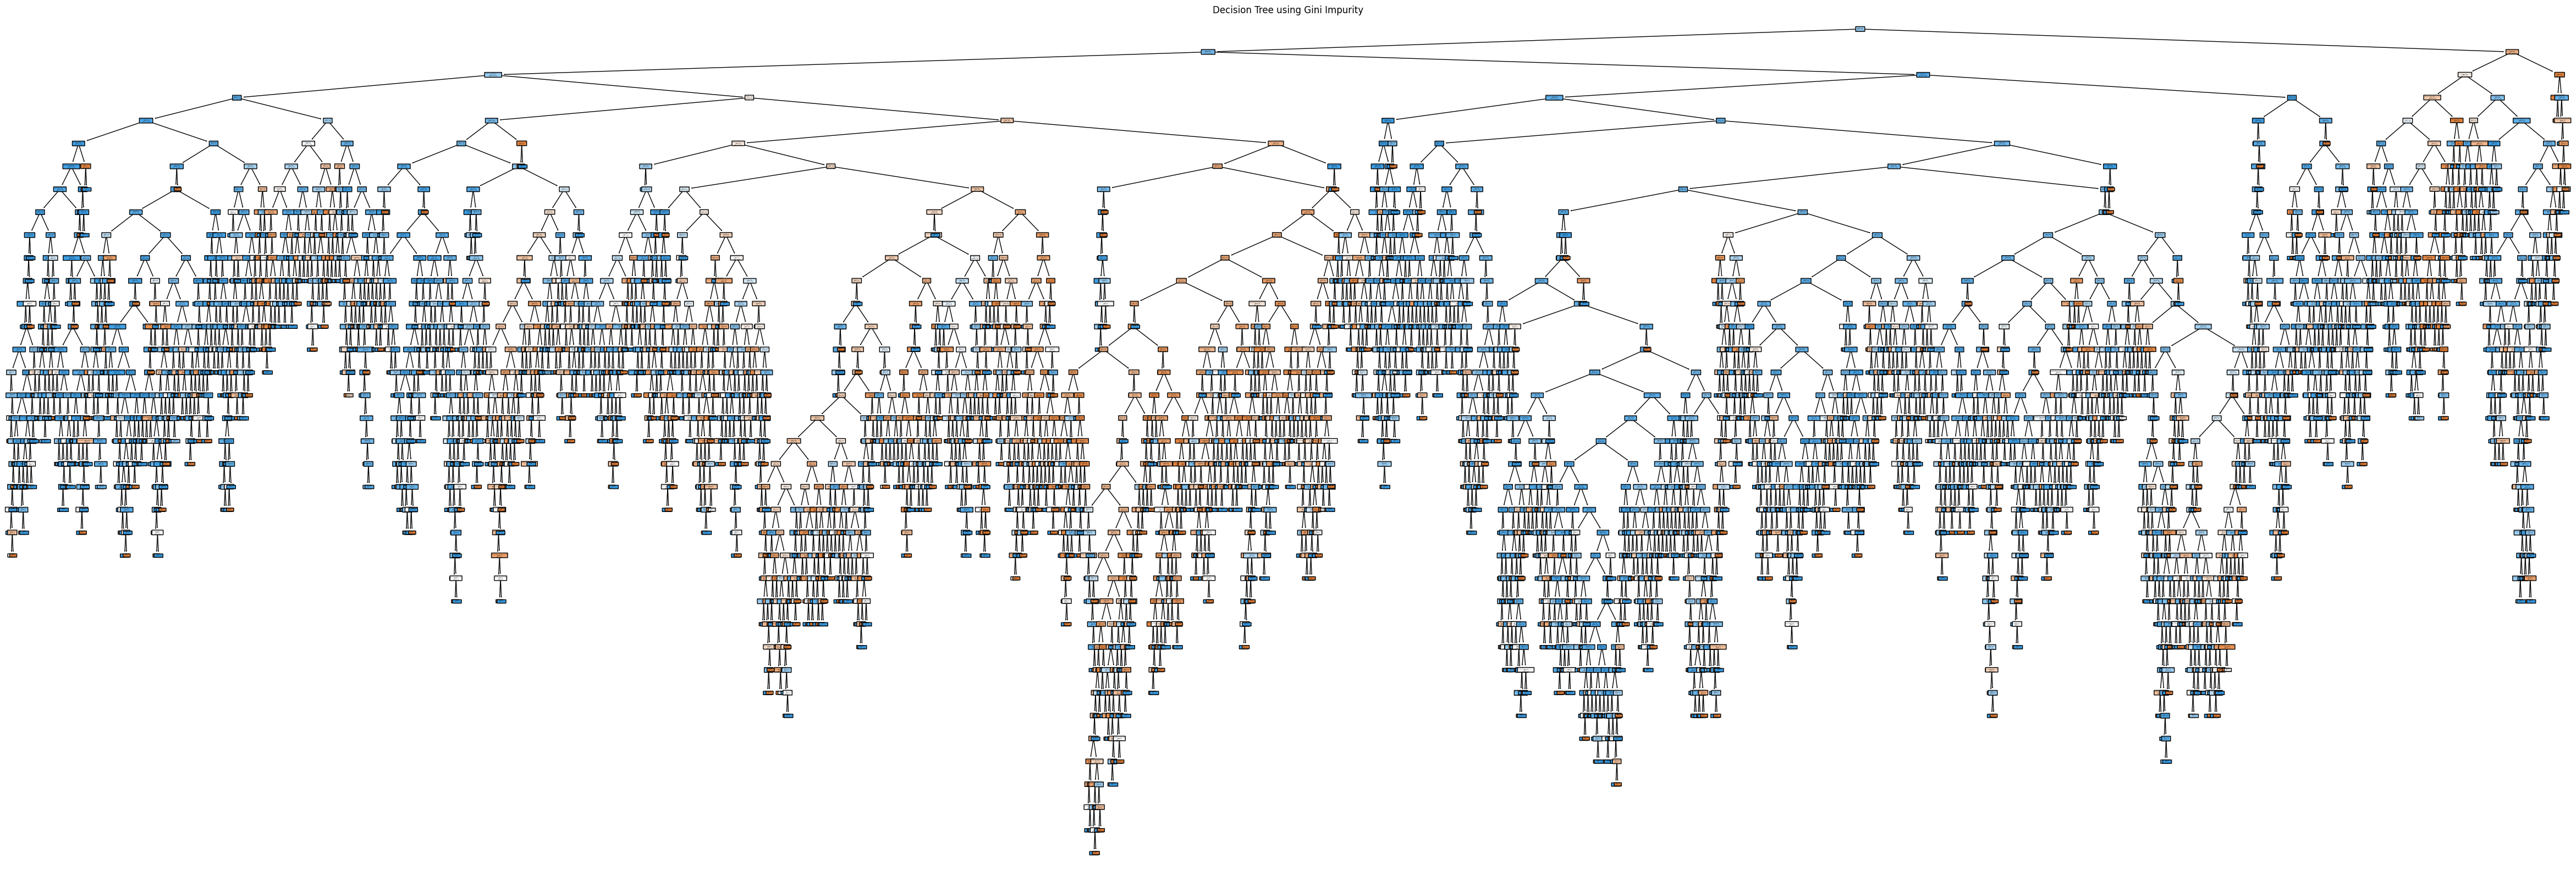

In [52]:
from sklearn.tree import plot_tree

# Visualizing the Decision Tree using Gini impurity
plt.figure(figsize=(60,20))
plot_tree(dt_gini, filled=True, feature_names = X_scaled.columns, class_names=['Canceled', 'Not_Canceled'], rounded=True)
plt.title("Decision Tree using Gini Impurity") 
plt.savefig('Decision_Tree_Gini.pdf')
plt.show()
plt.close()